In [1]:
import os
os.environ['SPARK_NAME'] = "/opt/spark"
# os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'lab'
# os.environ['PYSPARK_PYTHON'] = 'python'
os.environ['PYSPARK_DRIVER_PYTHON'] = '/opt/spark/work-dir/.venv/bin/python3'
os.environ['PYSPARK_PYTHON'] = '/opt/spark/work-dir/.venv/bin/python3'

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession\
        .builder\
        .master("local[2]")\
        .appName("Create-DataFrame")\
        .config("spark.memory.offHeap.enabled","true")\
        .config("spark.memory.offHeap.size","4g")\
        .getOrCreate()
spark.sparkContext

24/11/15 21:11:47 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


<SparkContext master=local[2] appName=Create-DataFrame>

In [4]:
sc = spark.sparkContext

In [5]:
!wget https://archive.ics.uci.edu/static/public/911/recipe+reviews+and+user+feedback+dataset.zip

--2024-11-15 21:12:33--  https://archive.ics.uci.edu/static/public/911/recipe+reviews+and+user+feedback+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘recipe+reviews+and+user+feedback+dataset.zip’

recipe+reviews+and+     [                <=> ]   2.02M   561KB/s    in 4.3s    

2024-11-15 21:12:38 (482 KB/s) - ‘recipe+reviews+and+user+feedback+dataset.zip’ saved [2114088]



In [6]:
!ls

lab_05.ipynb		       pan-tadeusz.txt
lab_06.ipynb		       polish.stopwords.txt
myenv			       recipe+reviews+and+user+feedback+dataset.zip
pan_tadeusz_bag_of_words.json


In [7]:
!mv recipe+reviews+and+user+feedback+dataset.zip recipe_reviews.zip

In [8]:
import zipfile
with zipfile.ZipFile("recipe_reviews.zip", 'r') as zip_ref:
    zip_ref.extractall("./data")

In [9]:
!ls ./data

'Recipe Reviews and User Feedback Dataset.csv'


In [10]:
!head -3 "data/Recipe Reviews and User Feedback Dataset.csv"

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,001,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because of onion haters in my house, used Italian seasoning instead of just oregano, and use a paprika/ cayenne mix and a little more than the recipe called for.. we like everything a bit more hot. The chili was amazing! It was easy to make and everyone absolutely loved it. It will now be a staple meal in our house."
1,001,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,"Bush used to have a white chili bean and it made this recipe super simple. I’ve written to them and asked them to please!, bring them back"


In [14]:
df_reviews = spark.read.csv('./data/Recipe Reviews and User Feedback Dataset.csv', header=True, sep=",")

df_reviews.show()

+---+-------------+-----------+------------------+--------------------+--------------+----------------+---------------+----------+-----------+---------+-----------+-----+----------+--------------------+
|_c0|recipe_number|recipe_code|       recipe_name|          comment_id|       user_id|       user_name|user_reputation|created_at|reply_count|thumbs_up|thumbs_down|stars|best_score|                text|
+---+-------------+-----------+------------------+--------------------+--------------+----------------+---------------+----------+-----------+---------+-----------+-----+----------+--------------------+
|  0|          001|      14299|Creamy White Chili|sp_aUSaElGf_14299...|u_9iFLIhMa8QaG|         Jeri326|              1|1665619889|          0|        0|          0|    5|       527|I tweaked it a li...|
|  1|          001|      14299|Creamy White Chili|sp_aUSaElGf_14299...|u_Lu6p25tmE77j|         Mark467|             50|1665277687|          0|        7|          0|    5|       724|Bush us

24/11/15 21:14:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , recipe_number, recipe_code, recipe_name, comment_id, user_id, user_name, user_reputation, created_at, reply_count, thumbs_up, thumbs_down, stars, best_score, text
 Schema: _c0, recipe_number, recipe_code, recipe_name, comment_id, user_id, user_name, user_reputation, created_at, reply_count, thumbs_up, thumbs_down, stars, best_score, text
Expected: _c0 but found: 
CSV file: file:///opt/spark/work-dir/data/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv


In [15]:
df_reviews.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- recipe_number: string (nullable = true)
 |-- recipe_code: string (nullable = true)
 |-- recipe_name: string (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_reputation: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- reply_count: string (nullable = true)
 |-- thumbs_up: string (nullable = true)
 |-- thumbs_down: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- best_score: string (nullable = true)
 |-- text: string (nullable = true)



In [16]:
df_reviews = spark.read.csv('./data/Recipe Reviews and User Feedback Dataset.csv', header=True, sep=",", inferSchema=True)

In [17]:
df_reviews.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- recipe_number: string (nullable = true)
 |-- recipe_code: string (nullable = true)
 |-- recipe_name: string (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_reputation: string (nullable = true)
 |-- created_at: integer (nullable = true)
 |-- reply_count: integer (nullable = true)
 |-- thumbs_up: integer (nullable = true)
 |-- thumbs_down: integer (nullable = true)
 |-- stars: integer (nullable = true)
 |-- best_score: integer (nullable = true)
 |-- text: string (nullable = true)



In [18]:
df_reviews = df_reviews.withColumnRenamed("_c0", "id")
df_reviews.printSchema()

root
 |-- id: string (nullable = true)
 |-- recipe_number: string (nullable = true)
 |-- recipe_code: string (nullable = true)
 |-- recipe_name: string (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_reputation: string (nullable = true)
 |-- created_at: integer (nullable = true)
 |-- reply_count: integer (nullable = true)
 |-- thumbs_up: integer (nullable = true)
 |-- thumbs_down: integer (nullable = true)
 |-- stars: integer (nullable = true)
 |-- best_score: integer (nullable = true)
 |-- text: string (nullable = true)



In [19]:
from pyspark.sql.functions import desc

df_reviews.select("reply_count")\
    .orderBy(desc("reply_count"))\
    .show(10)

+-----------+
|reply_count|
+-----------+
|          3|
|          3|
|          3|
|          3|
|          3|
|          3|
|          2|
|          2|
|          2|
|          2|
+-----------+
only showing top 10 rows



In [20]:
df_reviews.groupBy("recipe_code")\
    .agg({"best_score": "sum"})\
    .withColumnRenamed("sum(best_score)", "total_best_score")\
    .orderBy(desc("total_best_score"))\
    .show(10)

+-----------+----------------+
|recipe_code|total_best_score|
+-----------+----------------+
|       2832|           98863|
|      14299|           85497|
|      17826|           64880|
|       3309|           64247|
|      21444|           60755|
|      32480|           59867|
|      12540|           59195|
|       2912|           54032|
|      42083|           51975|
|      19731|           47905|
+-----------+----------------+
only showing top 10 rows



In [21]:
df_reviews.groupBy("recipe_code")\
    .agg({"reply_count": "sum"})\
    .withColumnRenamed("sum(reply_count)", "total_comments")\
    .orderBy(desc("total_comments"))\
    .show(10)

+-----------+--------------+
|recipe_code|total_comments|
+-----------+--------------+
|       2832|            16|
|        414|            13|
|      32480|            12|
|      14299|            10|
|      18345|            10|
|       8202|             9|
|      12003|             8|
|      41095|             8|
|       1324|             8|
|       8431|             6|
+-----------+--------------+
only showing top 10 rows



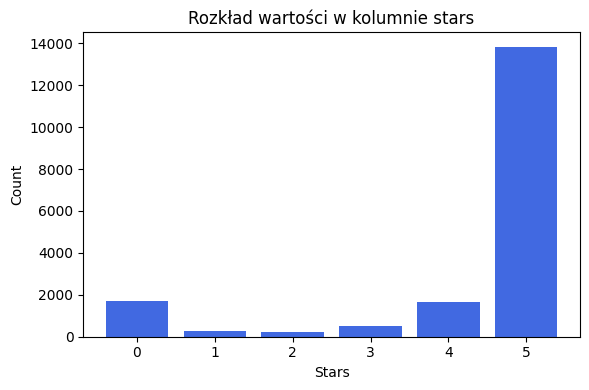

In [34]:
stars_distribution = df_reviews.groupBy("stars")\
    .count()\
    .orderBy("stars")\
    .toPandas()

plt.figure(figsize=(6, 4))
plt.bar(stars_distribution['stars'], stars_distribution['count'], color='royalblue')

plt.title("Rozkład wartości w kolumnie stars")
plt.xlabel("Stars")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [45]:
header = ['id', 'firstname', 'lastname', 'age', 'salary']
firstnames = ['Adam', 'Katarzyna', 'Krzysztof', 'Marek', 'Aleksandra', 'Zbigniew', 'Wojciech', 'Mieczysław', 'Agata', 'Wisława']
lastnames = ['Mieczykowski', 'Kowalski', 'Malinowski' , 'Szczaw', 'Glut', 'Barański', 'Brzęczyszczykiewicz', 'Wróblewski', 'Wlotka', 'Pysla']
age = {'min': 18, 'max': 68}
salary = {'min': 3200, 'max': 12500}

In [46]:
import random
from tqdm import tqdm

def build_dataset(filename, n_rows=100, chunk_size=100000):
    rows = []
    rows.append(header)
    mu = (salary['max'] + salary['min']) / 2
    sigma = 1000

    with open(filename, 'w', encoding='utf-8') as filehandler:
        
        for id in tqdm(range(1, n_rows + 1), total=n_rows, desc="Building dataset..."):
            row = [
                f'{id}', 
                f'{random.choice(firstnames)}', 
                f'{random.choice(lastnames)}', 
                f"{random.randint(age['min'], age['max'])}",
                f"{round(float(random.normalvariate(mu=mu, sigma=sigma)), 2)}"
            ]
            rows.append(row)
            if id % chunk_size == 0:
                filehandler.writelines([f"{','.join(row)}\n" for row in rows])
                rows = []

In [47]:
build_dataset('employee.csv', 20_000_000)

Building dataset...: 100%|███████████████████████████████████████████████████████████████| 20000000/20000000 [01:07<00:00, 295519.47it/s]


In [48]:
import time

df = spark.read.csv('employee.csv', header=True, inferSchema=True)

[Stage 99:================================================>         (5 + 1) / 6]

CPU times: user 13.8 ms, sys: 3.09 ms, total: 16.9 ms
Wall time: 8.5 s


In [58]:
start_time = time.time()
count_result = df.filter(df["salary"] > 10000).count()
end_time = time.time()

print(f"Liczba wyników: {count_result}")
print(f"Czas wykonania: {end_time - start_time:.4f} sekund")

[Stage 109:===============================================>         (5 + 1) / 6]

Liczba wyników: 315064
Czas wykonania: 6.0551 sekund


In [51]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: double (nullable = true)



In [64]:
from pyspark.sql.types import DoubleType

df2 = spark.read.csv('employee.csv', header=True)
df2.show()


+---+----------+-------------------+---+-------+
| id| firstname|           lastname|age| salary|
+---+----------+-------------------+---+-------+
|  1|     Agata|               Glut| 63|8399.95|
|  2| Krzysztof|             Wlotka| 61|8028.42|
|  3|     Agata|           Kowalski| 18|6724.55|
|  4|     Marek|       Mieczykowski| 30|7339.13|
|  5|  Wojciech|             Szczaw| 45|7022.29|
|  6|  Zbigniew|Brzęczyszczykiewicz| 37|7169.08|
|  7|Aleksandra|           Barański| 45| 7303.9|
|  8|  Zbigniew|         Wróblewski| 31|7609.14|
|  9|Aleksandra|           Barański| 48|7254.13|
| 10|  Wojciech|         Wróblewski| 24|7082.74|
| 11|  Zbigniew|         Malinowski| 64|7532.68|
| 12|Aleksandra|             Wlotka| 61| 8256.7|
| 13|   Wisława|           Barański| 66|8909.53|
| 14|Mieczysław|              Pysla| 46|6937.54|
| 15| Krzysztof|           Barański| 20|8362.84|
| 16| Krzysztof|               Glut| 40|7696.18|
| 17|  Zbigniew|             Szczaw| 59|8898.98|
| 18|Mieczysław|    

In [65]:
start_time = time.time()
count_result = df2.filter(df2["salary"] > 10000).count()
end_time = time.time()

print(f"Liczba wyników: {count_result}")
print(f"Czas wykonania: {end_time - start_time:.4f} sekund")

[Stage 122:===============================================>         (5 + 1) / 6]

Liczba wyników: 314277
Czas wykonania: 6.5825 sekund


In [66]:
df_employee = df.withColumn("salary_casted", df["salary"].cast(DoubleType()))

start_time = time.time()
count_result = df_employee.filter(df_employee["salary_casted"] > 10000).count()
end_time = time.time()

print(f"Liczba wyników: {count_result}")
print(f"Czas wykonania: {end_time - start_time:.4f} sekund")

[Stage 125:===============================================>         (5 + 1) / 6]

Liczba wyników: 315064
Czas wykonania: 5.9096 sekund


## Występuje spora różnica w czasie obliczania dla danych numerycznych **(6.58s do 5.90s)**

In [69]:
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import col, when

splits = [10, 20, 30, 40, 50, 60, 70]

bucketizer = Bucketizer(splits=splits, inputCol="age", outputCol="age_bucket")

df_buckets = bucketizer.transform(df_employee)

df_with_buckets = df_buckets.withColumn(
    "age_bucket_label",
    when(col("age_bucket") == 0.0, "10-19")
    .when(col("age_bucket") == 1.0, "20-29")
    .when(col("age_bucket") == 2.0, "30-39")
    .when(col("age_bucket") == 3.0, "40-49")
    .when(col("age_bucket") == 4.0, "50-59")
    .when(col("age_bucket") == 5.0, "60-69")
    .otherwise("unknown")
)

df_with_buckets.select("id", "firstname", "lastname", "age", "age_bucket_label").show(20)

df_bucket_count = df_with_buckets.groupBy("age_bucket_label").count().orderBy("age_bucket_label")
df_bucket_count.show()


+---+----------+-------------------+---+----------------+
| id| firstname|           lastname|age|age_bucket_label|
+---+----------+-------------------+---+----------------+
|  1|     Agata|               Glut| 63|           60-69|
|  2| Krzysztof|             Wlotka| 61|           60-69|
|  3|     Agata|           Kowalski| 18|           10-19|
|  4|     Marek|       Mieczykowski| 30|           30-39|
|  5|  Wojciech|             Szczaw| 45|           40-49|
|  6|  Zbigniew|Brzęczyszczykiewicz| 37|           30-39|
|  7|Aleksandra|           Barański| 45|           40-49|
|  8|  Zbigniew|         Wróblewski| 31|           30-39|
|  9|Aleksandra|           Barański| 48|           40-49|
| 10|  Wojciech|         Wróblewski| 24|           20-29|
| 11|  Zbigniew|         Malinowski| 64|           60-69|
| 12|Aleksandra|             Wlotka| 61|           60-69|
| 13|   Wisława|           Barański| 66|           60-69|
| 14|Mieczysław|              Pysla| 46|           40-49|
| 15| Krzyszto

[Stage 137:===============================================>         (5 + 1) / 6]

+----------------+-------+
|age_bucket_label|  count|
+----------------+-------+
|           10-19| 784111|
|           20-29|3920558|
|           30-39|3923697|
|           40-49|3921071|
|           50-59|3920783|
|           60-69|3529780|
+----------------+-------+

